# Feature Tools Exploration #

Evan Solomonides

In [1]:
import featuretools as ft
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.parser import parse
import pandas as pd

In [2]:
data = ft.demo.load_mock_customer()

In [3]:
customers = data["customers"]
print np.size(customers)

15


In [4]:
sessions = data["sessions"]
print np.size(sessions)

140


In [5]:
transactions = data["transactions"]
print np.size(transactions)

2500


In [6]:
entities = {"customers" : (customers, "customer_id"), "sessions" : (sessions, "session_id", "session_start"), "transactions" : (transactions, "transaction_id", "transaction_time")}

In [7]:
relationships = [("sessions", "session_id", "transactions", "session_id"), ("customers", "customer_id", "sessions", "customer_id")]

In [8]:
feature_matrix_customers, features_defs = ft.dfs(entities=entities, relationships=relationships, target_entity="customers")

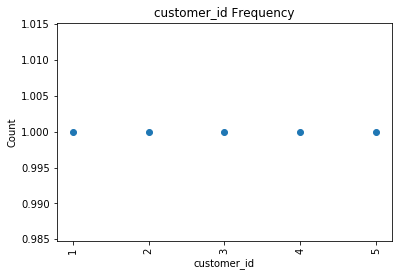

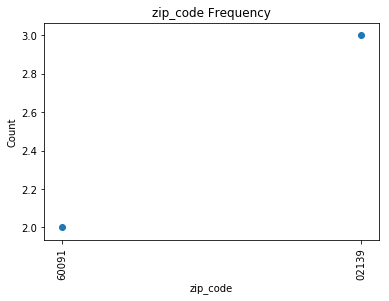

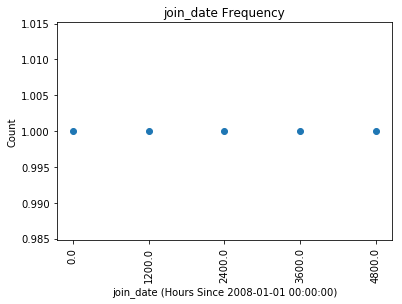

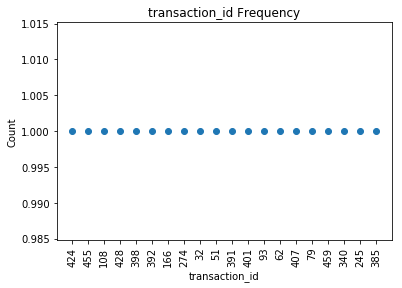

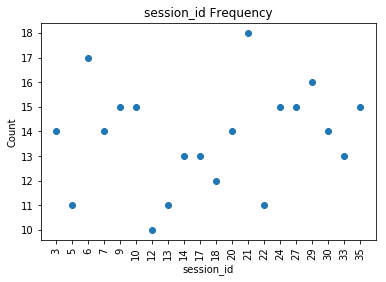

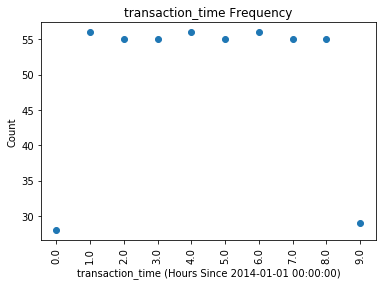

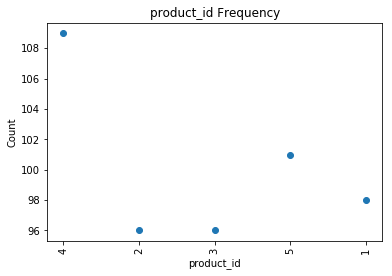

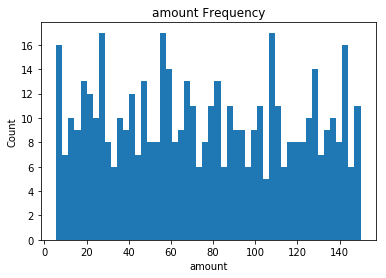

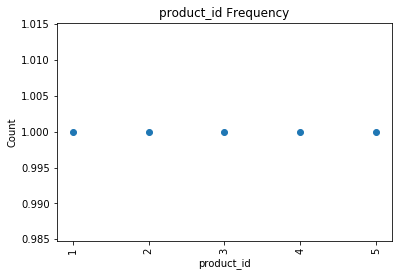

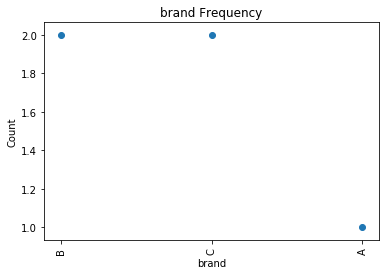

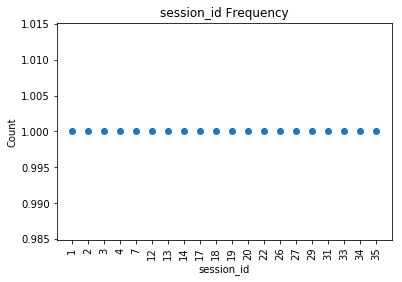

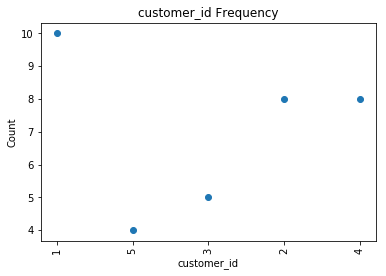

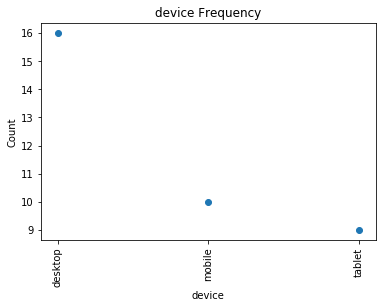

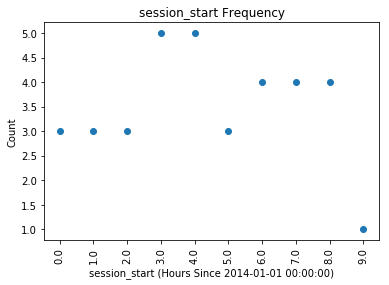

In [9]:
def qualtoquant(set):
    aset = np.array(set)
    if type(aset[0]) == np.datetime64:
        earliest = np.amin(aset)
        aset = aset - np.amin(aset)
        aset = [np.around(t/ np.timedelta64(1, 'h'), 0) for t in aset]
    cat = []
    count = []
    for p in aset:
        if p not in cat:
            cat.append(p)
            count.append(np.size(np.where(aset == p)))
    cat = np.array(cat)
    count = np.array(count)
    
    while np.size(cat) > 20:
        i = np.random.randint(np.size(cat))
        cat = np.delete(cat, i, 0)
        count = np.delete(count, i, 0)
        
    return [cat, count]

def plotstuff(dataset):
    keynames = dataset.keys()    
    numcats = len(keynames)
    
    for i in range(numcats):
        thisset = dataset[keynames[i]]
        if type(thisset[0]) == np.float64 or type(thisset[0]) == np.float32:
            plt.hist(thisset, bins = np.size(thisset)/10)
            plt.title(keynames[i] + ' Frequency')
            plt.ylabel('Count')
            plt.xlabel(keynames[i])
            plt.show()
        else:
            if type(thisset[0]) == pd._libs.tslibs.timestamps.Timestamp:
                plt.xlabel(keynames[i] + " (Hours Since " + str(np.amin(thisset)) + ")")
            else:
                plt.xlabel(keynames[i])
            categories, counts = qualtoquant(thisset)
            plt.scatter(range(1, np.size(counts)+1), counts)
            plt.title(keynames[i] + ' Frequency')
            plt.ylabel('Count')
            plt.xticks(range(1, np.size(counts)+1), categories, rotation='vertical')
            plt.show()

for k in data.keys():
    plotstuff(data[k])

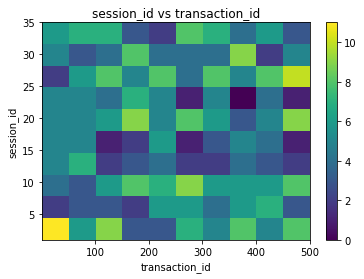

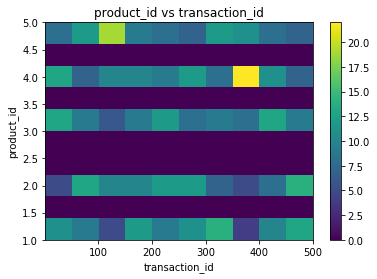

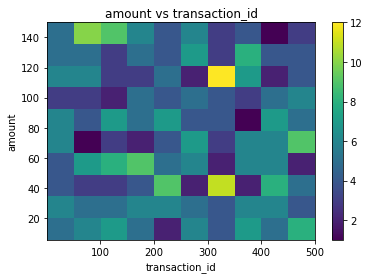

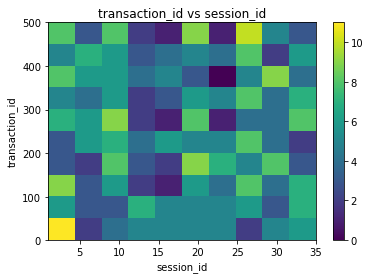

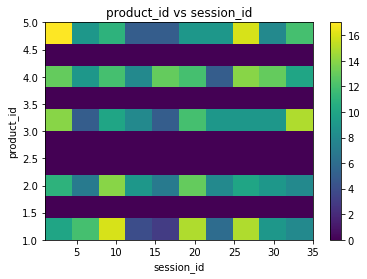

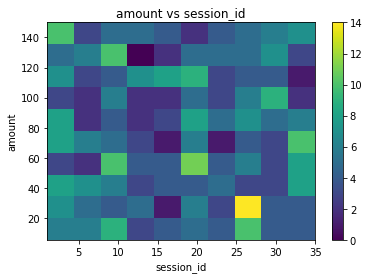

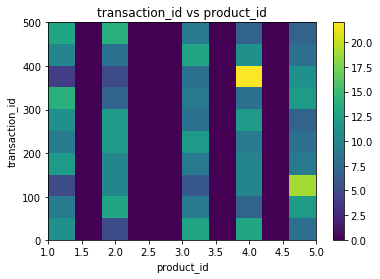

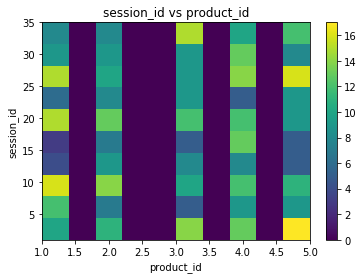

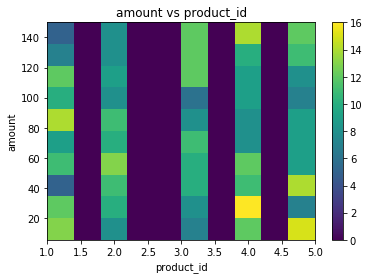

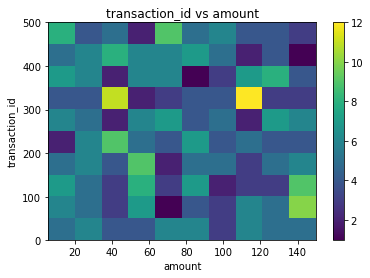

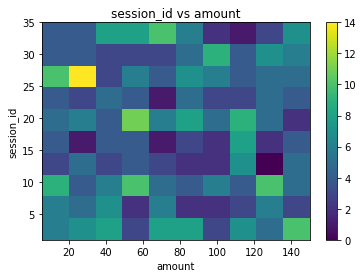

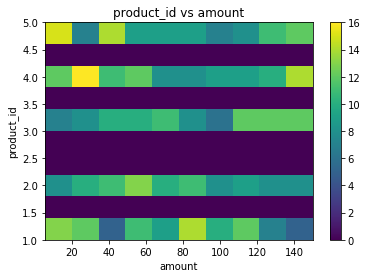

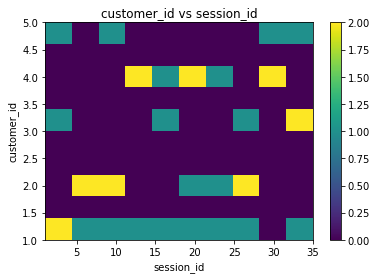

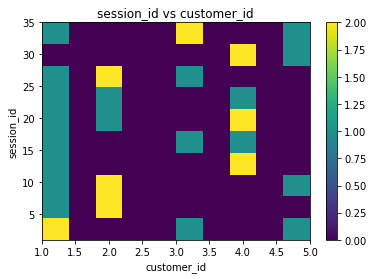

In [10]:
def plotting2d(set):
    for k1 in set.keys():
        set1 = set[k1]
        for k2 in set.keys():
            set2 = set[k2]
            if (type(set1[0]) == np.int32 or type(set1[0]) == np.int64 or type(set1[0]) == np.float64) and (type(set2[0]) == np.int32 or type(set2[0]) == np.int64 or type(set2[0]) == np.float64) and k1 != k2:
                plt.hist2d(set[k1], set[k2])
                plt.title(k2 + ' vs ' + k1)
                plt.xlabel(k1)
                plt.ylabel(k2)
                plt.colorbar()
                plt.show()

for k in data.keys():
    plotting2d(data[k])

In [11]:
print "Fin."

Fin.
